In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

pd.set_option('display.max_columns', None)

In [6]:
print(train['education'].isnull().value_counts())

False    14833
True       167
Name: education, dtype: int64


## 상관관계

<AxesSubplot:ylabel='nerdiness'>

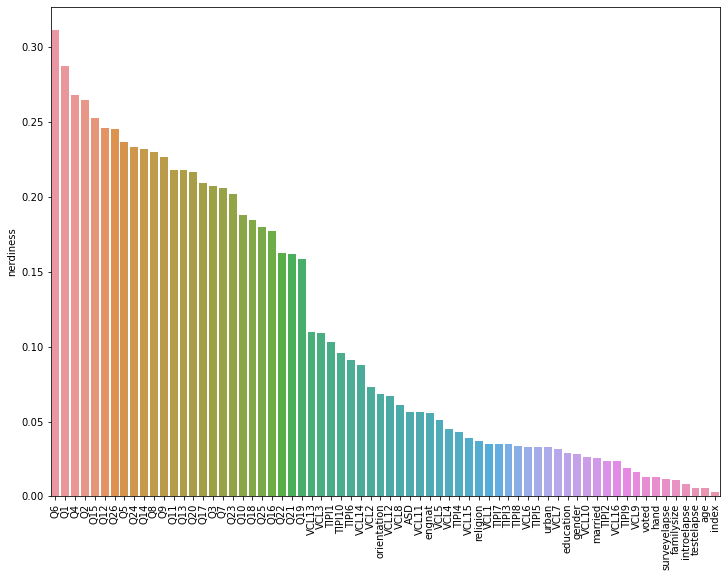

In [14]:
plt.figure(figsize=(12,9)) # 사이즈 변경
plt.xticks(rotation = 90) # x축 text 회전
sns.barplot(x = abs(train.corr()["nerdiness"]).sort_values(ascending = False)[1:].index ,
            y = abs(train.corr()["nerdiness"]).sort_values(ascending = False)[1:]) # nerdiness을 제외하고 나머지와의 상관관계 시각화

#### Education

<AxesSubplot:xlabel='education', ylabel='count'>

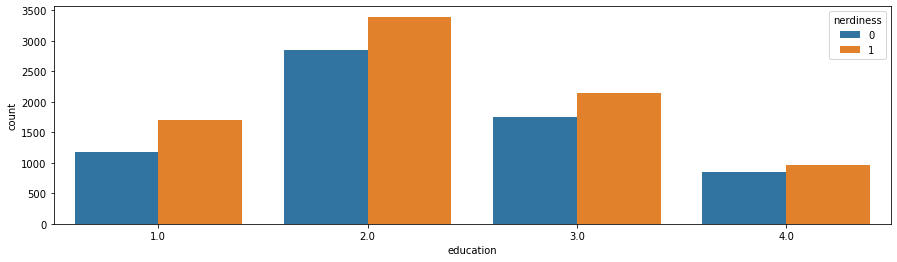

In [5]:
# Education
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['education'],hue = 'nerdiness')

Education의 경우 nerdiness의 비율이 전체적으로 높은 것을 확인할 수 있다. 하지만 숫자가 증가할 수록 비율이 감소하는 것으로 봐서 어느 정도 유효한 feature인 듯하다. null값들은 평균값인 2.0으로 채워넣으면 될 듯 하다.

#### Urban

In [6]:
print(train['urban'].isnull().value_counts())

False    15000
Name: urban, dtype: int64


<AxesSubplot:xlabel='urban', ylabel='count'>

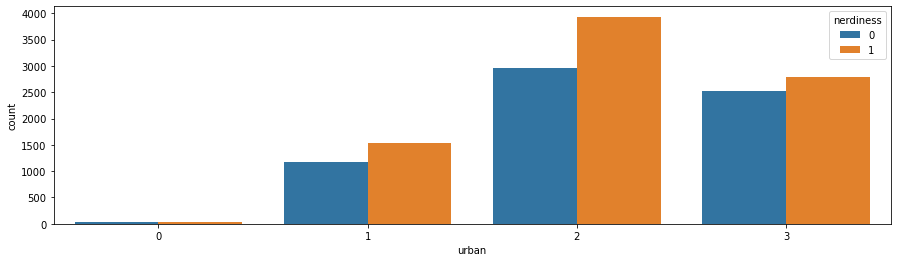

In [7]:
plt.figure(figsize=(15,4)) # 사이즈 변경
sns.countplot(data= train, x= train['urban'],hue = 'nerdiness') # 연령대별 target 분포

2번을 택한 사람이 nerdiness의 비율이 현저하게 높게 나타나는 것을 확인했다. 그리고 결측값은 없다. 그냥 넘어가도 좋을 듯 하다.

#### gender

In [8]:
print(train['gender'].isnull().value_counts())

False    14981
True        19
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

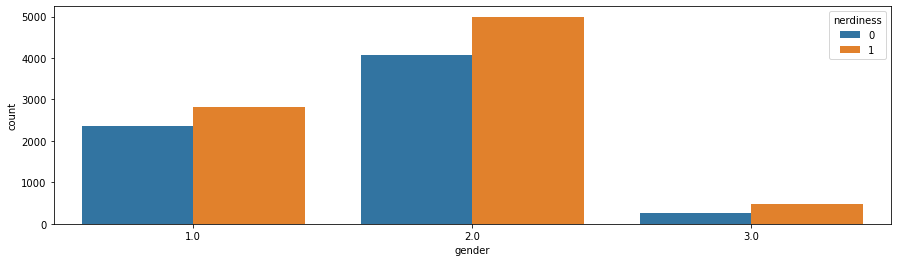

In [9]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['gender'],hue = 'nerdiness')

gender는 1남자, 2여자, 3other인데 결측값은 평균값인 2로 채워 넣는 것이 좋아보인다. 

#### engnat

In [10]:
print(train['engnat'].isnull().value_counts())

False    14953
True        47
Name: engnat, dtype: int64


<AxesSubplot:xlabel='engnat', ylabel='count'>

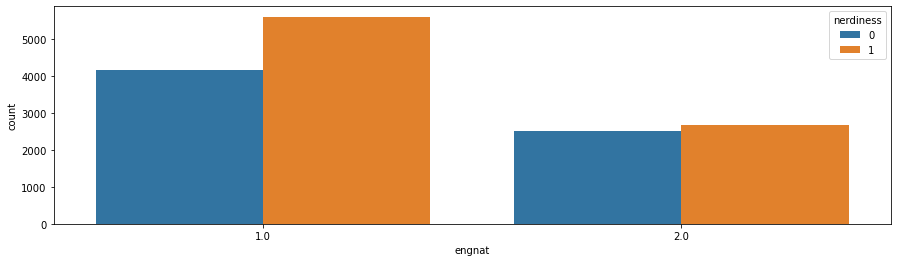

In [11]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['engnat'],hue = 'nerdiness')

In [ ]:
print(train['engnat'].isnull().value_counts())

False    14953
True        47
Name: engnat, dtype: int64


흥미로운 feature이다. 영어권에 살고 있는 사람이 nerdiness의 비중이 높았다. 결측치들을 한 번 비교해봐야겠다.

In [12]:
train[train['engnat'].isnull()]['nerdiness'].value_counts()

1    24
0    23
Name: nerdiness, dtype: int64

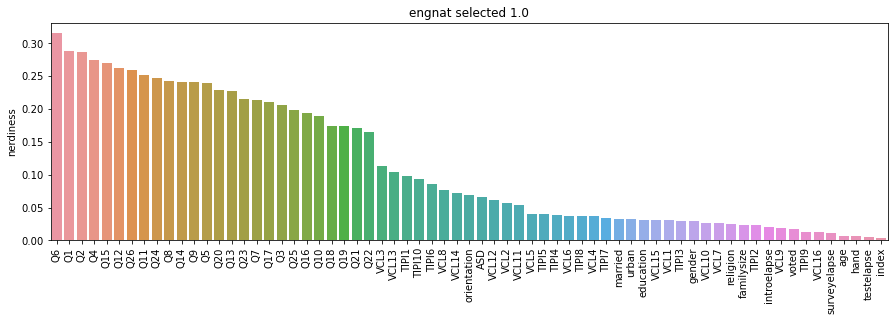

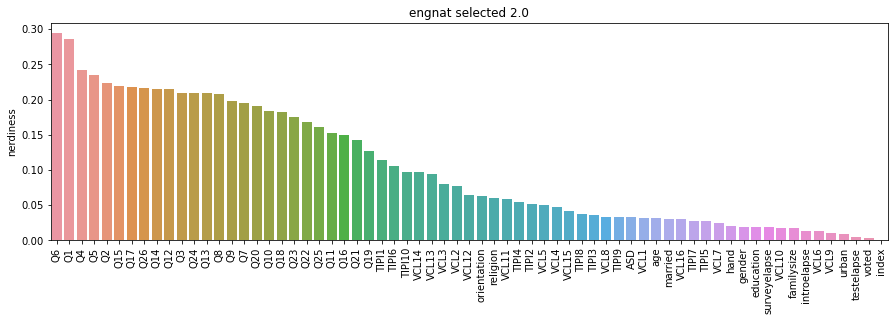

In [ ]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
select_1 = sns.barplot(x = abs(train[train['engnat']==1.0].corr()["nerdiness"]).sort_values(ascending = False)[1:-1].index ,
                      y = abs(train[train['engnat']==1.0].corr()["nerdiness"]).sort_values(ascending = False)[1:-1]) # nerdiness, index를 제외하고 나머지와의 상관관계 시각화
select_1.set(title='engnat selected 1.0')
plt.show()

plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
select_2 = sns.barplot(x = abs(train[train['engnat']==2.0].corr()["nerdiness"]).sort_values(ascending = False)[1:-1].index ,
                      y = abs(train[train['engnat']==2.0].corr()["nerdiness"]).sort_values(ascending = False)[1:-1]) # nerdiness, index를 제외하고 나머지와의 상관관계 시각화
select_2.set(title='engnat selected 2.0')
plt.show()

nerdiness에 평가를 안한 사람의 nerdiness 비율은 같았다. 전체적으로 1을 고른 사람이 많으므로 모두 1로 결측치를 채워주는 것이 좋을 것 같다.

#### age

In [13]:
print(train['age'].isnull().value_counts())

False    15000
Name: age, dtype: int64


<AxesSubplot:xlabel='age', ylabel='count'>

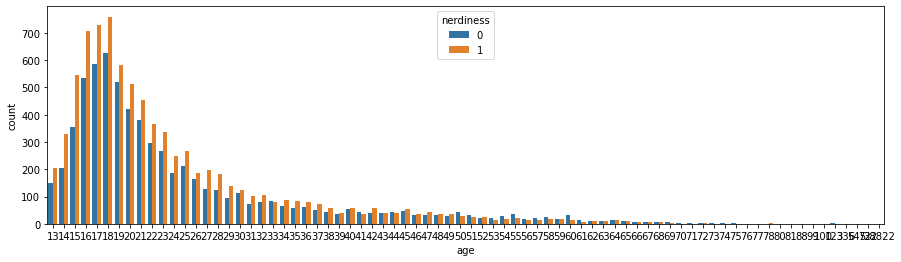

In [15]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['age'],hue = 'nerdiness')

age의 경우 일단 말도안되게 많은 나이를 가지고 있는 사람이 존재한다. 우선 이사람들의 조사 결과가 유효한지 출력을 해보지

In [16]:
train[train['age'] > 80]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1019,1019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,USA,2,39,172,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4.0,2,3.0,2.0,100,3.0,10.0,5.0,1.0,1.0,2919.0,1.0,0
1739,1739,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,CAN,2,68,121,3.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,4.0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,2.0,3,3.0,2.0,123,1.0,2.0,4.0,2.0,1.0,3.0,2.0,0
4002,4002,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,CAN,2,68,121,3.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,4.0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,2.0,3,3.0,2.0,123,1.0,2.0,4.0,2.0,1.0,3.0,2.0,0
4976,4976,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,1.0,5.0,4.0,5.0,1.0,4.0,5.0,5.0,1.0,4.0,1.0,2.0,4.0,4.0,4.0,5.0,NOR,13,106,208,2.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,2.0,2.0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,2.0,1,1.0,2.0,545,1.0,2.0,1.0,1.0,2.0,4.0,2.0,0
6526,6526,1.0,5.0,NaN,5.0,5.0,5.0,4.0,3.0,5.0,5.0,1.0,5.0,3.0,5.0,NaN,5.0,3.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,1.0,5.0,USA,10,171,586,3.0,1.0,4.0,3.0,5.0,2.0,4.0,3.0,3.0,4.0,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,4.0,1,2.0,1.0,88,1.0,4.0,1.0,2.0,2.0,3.0,2.0,1
6725,6725,1.0,1.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,1.0,1.0,5.0,3.0,5.0,1.0,1.0,1.0,5.0,1.0,3.0,1.0,1.0,1.0,5.0,5.0,5.0,USA,8732,8663,300,3.0,2.0,4.0,3.0,4.0,3.0,4.0,2.0,3.0,1.0,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,3.0,2,1.0,1.0,722,2.0,2.0,1.0,1.0,2.0,3.0,2.0,0
9273,9273,5.0,3.0,1.0,5.0,4.0,3.0,3.0,4.0,5.0,1.0,4.0,3.0,4.0,2.0,1.0,3.0,2.0,1.0,3.0,3.0,3.0,1.0,5.0,4.0,3.0,2.0,USA,1,89,125,1.0,5.0,1.0,5.0,5.0,1.0,4.0,5.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1.0,2,2.0,1.0,38822,1.0,2.0,3.0,2.0,1.0,3.0,2.0,1
12092,12092,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,3.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,1.0,4.0,5.0,3.0,5.0,USA,499,186,205,1.0,5.0,3.0,1.0,4.0,NaN,1.0,2.0,4.0,1.0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1.0,3,1.0,1.0,99,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1
12574,12574,1.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,NOR,14,129,232,3.0,3.0,4.0,4.0,3.0,5.0,3.0,1.0,4.0,2.0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,4.0,3,1.0,2.0,81,1.0,6.0,1.0,2.0,2.0,1.0,2.0,0
14135,14135,4.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,2.0,4.0,5.0,5.0,5.0,5.0,2.0,4.0,5.0,5.0,5.0,BWA,172,70,114,3.0,3.0,4.0,3.0,4.0,5.0,4.0,2.0,4.0,2.0,1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,3.0,1,2.0,2.0,336,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1


큰 의미를 주는 feature이다.  
우선 age가 지나치게 높은 결과값이 나온 경우 잘못기입했거나, 아니면 의미없는 조사결과일 수 있다. 
조사결과 중 한 번호로만 찍은 사람이 존재하고, 사실상 가능성이 없는 모든 column 값이 똑같은 사람이 존재했다.

여기서 그럼 해야할일은 다음과 같다.  
1. 모든 Q 또는 TIPI에 대해 모두 똑같은 번호를 가지고 있는 경우 drop
2. 중복 참여한 사람 존재 시 하나를 뺀 나머지 drop

#### hand


In [18]:
print(train['hand'].isnull().value_counts())

False    14953
True        47
Name: hand, dtype: int64


<AxesSubplot:xlabel='hand', ylabel='count'>

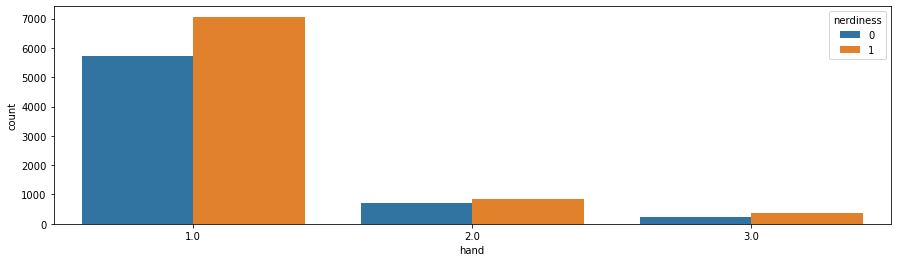

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['hand'],hue = 'nerdiness')

오른손잡이, 왼손잡이, 양손잡이 순이다.  
사실 비율에 따라 nerdiness의 격차가 커지는 것일 뿐이지, target과 큰 상관관계는 없어 보인다.  
따라서 이feature은 없애주는 것이 좋을 것 같다.

#### religion

In [20]:
print(train['religion'].isnull().value_counts())

False    14755
True       245
Name: religion, dtype: int64


<AxesSubplot:xlabel='religion', ylabel='count'>

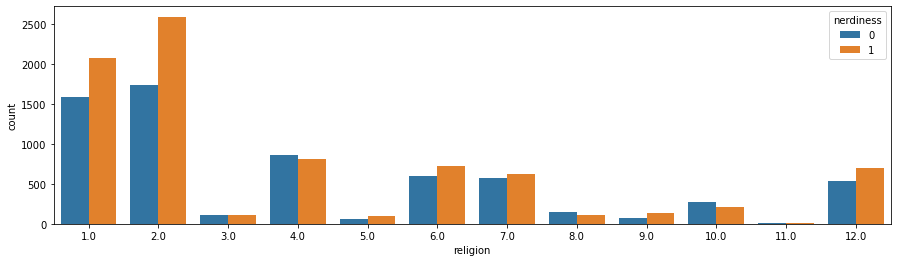

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['religion'],hue = 'nerdiness')

지역마다 nerdiness의 비율이 모두 다른 것을 볼 수 있다.  
이 feature은 유용하게 사용될 수 있을 것 같다.  
하지만 결측치가 245개로 많은 것을 볼 수 있다. 유효한 검사치를 가지고 있는지 데이터를 확인해보자.

In [78]:
train[train['religion'].isnull()]['age']

92       18
111      18
247      18
386      18
642      21
         ..
14830    28
14842    32
14894    17
14898    19
14915    28
Name: age, Length: 245, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

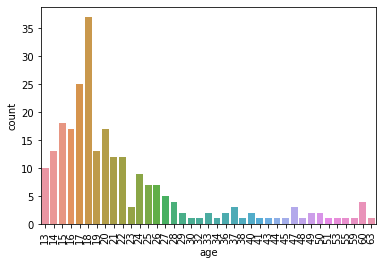

In [80]:
plt.xticks(rotation=90)
sns.countplot(train[train['religion'].isnull()]['age'])

<AxesSubplot:xlabel='age', ylabel='count'>

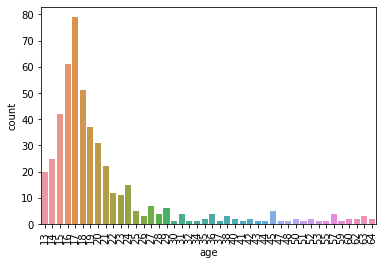

In [81]:
plt.xticks(rotation=90)
sns.countplot(test[test['religion'].isnull()]['age'])

비율은 나이대에 따라 비례하다. 그냥 전체적으로 무응답률이 비슷하다.   
결측치는 반은 1, 반은 2에 넣어서 최대한 영향을 주지 얺게끔 하는 것이 좋을 것 같다.

#### orientation

In [82]:
print(train['orientation'].isnull().value_counts())

False    14601
True       399
Name: orientation, dtype: int64


<AxesSubplot:xlabel='orientation', ylabel='count'>

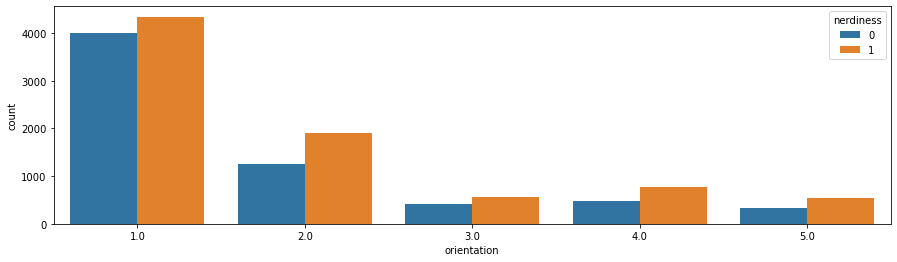

In [83]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['orientation'],hue = 'nerdiness')

orientaion은 target과 상관관계가 높고, 결측치가 많은 만큼 신중하게 처리해야할 것 같다.  
우선 전체적으로 모든 응답에서 nerdiness가 1번을 고르지 않았을 때 상대적 비율이 높은 것을 볼 수 있다.  
다른 것을 고른 사람들의 다른 feature간의 관계를 봐보자..

In [133]:
not_necessary = []
for i in range(1, 17):
    not_necessary.append('VCL' + str(i))

for i in range(1, 27):
    not_necessary.append('Q' + str(i))

for i in range(1, 11):
    not_necessary.append('TIPI' + str(i))

not_necessary.append('nerdiness')
not_necessary.append('index')
not_necessary.append('orientation')

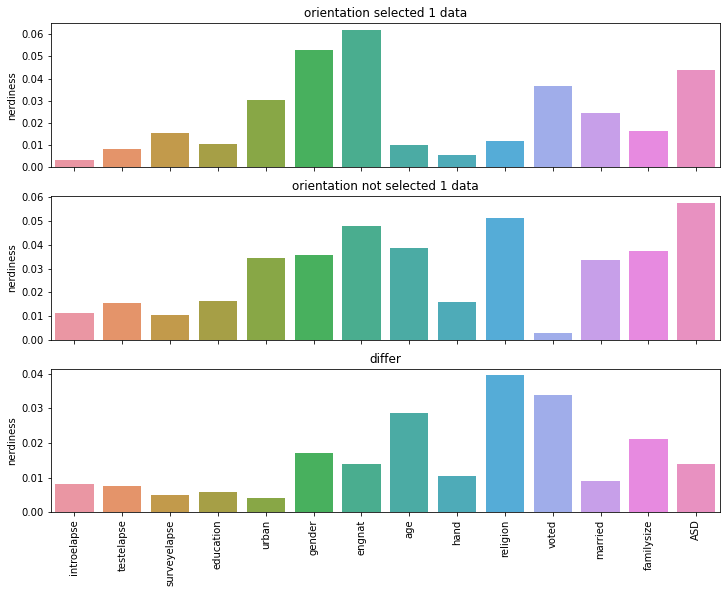

In [149]:
fig, ax = plt.subplots(3, 1, figsize=(12,9))
plt.xticks(rotation = 90) # x축 text 회전

select_1 = sns.barplot(x = abs(train[train["orientation"]!=1.0].corr()["nerdiness"]).drop(not_necessary).index ,
            y = abs(train[train["orientation"]!=1.0].corr()["nerdiness"]).drop(not_necessary), ax = ax[0])  #nerdiness , index , orientation 제외한 상관계수 시각화
select_1.set(xticklabels=[])
select_1.set(title='orientation selected 1 data') # 

not_select_1 = sns.barplot(x = abs(train[train["orientation"]== 1.0].corr()["nerdiness"]).drop(not_necessary).index ,
            y = abs(train[train["orientation"]== 1.0].corr()["nerdiness"]).drop(not_necessary), ax = ax[1]) 
not_select_1.set(title='orientation not selected 1 data')
not_select_1.set(xticklabels=[])


differ = sns.barplot(x = abs(train[train["orientation"]!=1.0].corr()["nerdiness"]).drop(not_necessary).index ,
            y = abs(abs(train[train["orientation"]!=1.0].corr()["nerdiness"]).drop(not_necessary) - abs(train[train["orientation"]== 1.0].corr()["nerdiness"]).drop(not_necessary)), ax = ax[2])  #nerdiness , index , orientation 제외한 상관계수 시각화
differ.set(title='differ') # 

plt.show()

추측할 수 있는 것은 성소수자인 사람들과 성소수자가 아닌 사람들은 religion, voted, age 순으로 nerdiness의 수가 많은 차이를 보였다.  
nerdiness는 성소수자에 한해서 종교, 나이의 상관계수가 비성수자에 비해 유독 높다.

<AxesSubplot:xlabel='religion', ylabel='count'>

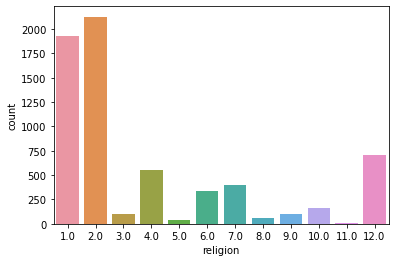

In [153]:
sns.countplot(train[train['orientation'] != 1]['religion'])

<AxesSubplot:xlabel='religion', ylabel='count'>

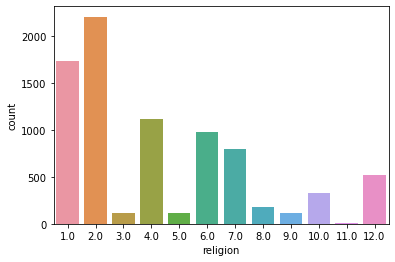

In [154]:
sns.countplot(train[train['orientation'] == 1]['religion'])

이제 알겠다. 성소수자는 4, 6, 7번 region을 많이 가지고 있다.  
자 이제 그럼 결측치의 경우를 보자

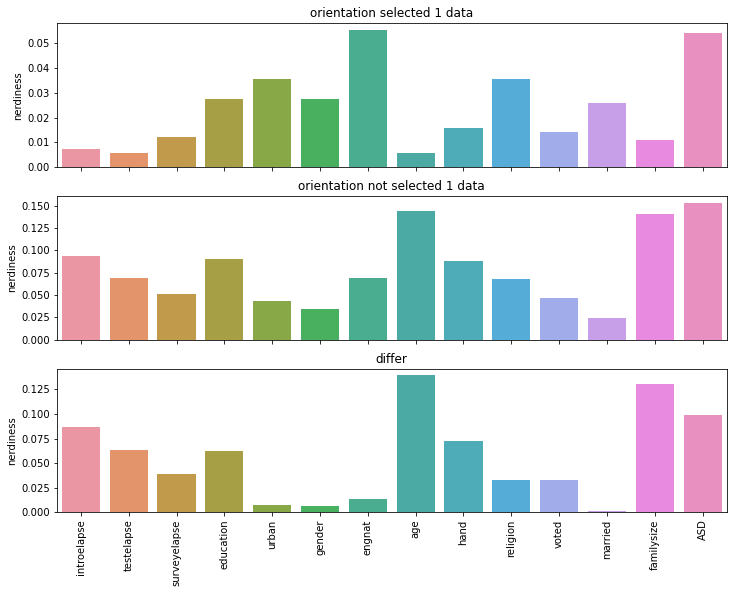

In [157]:
fig, ax = plt.subplots(3, 1, figsize=(12,9))
plt.xticks(rotation = 90) # x축 text 회전

select_1 = sns.barplot(x = abs(train[train["orientation"].isnull()!=1.0].corr()["nerdiness"]).drop(not_necessary).index ,
            y = abs(train[train["orientation"].isnull()!=1.0].corr()["nerdiness"]).drop(not_necessary), ax = ax[0])  #nerdiness , index , orientation 제외한 상관계수 시각화
select_1.set(xticklabels=[])
select_1.set(title='orientation selected 1 data') # 

not_select_1 = sns.barplot(x = abs(train[train["orientation"].isnull()== 1.0].corr()["nerdiness"]).drop(not_necessary).index ,
            y = abs(train[train["orientation"].isnull()== 1.0].corr()["nerdiness"]).drop(not_necessary), ax = ax[1]) 
not_select_1.set(title='orientation not selected 1 data')
not_select_1.set(xticklabels=[])


differ = sns.barplot(x = abs(train[train["orientation"].isnull()!=1.0].corr()["nerdiness"]).drop(not_necessary).index ,
            y = abs(abs(train[train["orientation"].isnull()!=1.0].corr()["nerdiness"]).drop(not_necessary) - abs(train[train["orientation"].isnull()== 1.0].corr()["nerdiness"]).drop(not_necessary)), ax = ax[2])  #nerdiness , index , orientation 제외한 상관계수 시각화
differ.set(title='differ') # 

plt.show()

아 그런줄 알았더니 이번엔 다르다.. 아무 관계성이 없었던 것이다.. 그럼 결측치는 두 가지 방법으로 실행해야 겠다.  
1. 결측치 모두 1로 변환
2. 결측치 중 target이 0인 경우 1로 변환, target이 1인 경우 2~5에 랜덤으로 뿌림, 아니면 2에다 뿌림

#### voted

In [158]:
print(train['voted'].isnull().value_counts())

False    14915
True        85
Name: voted, dtype: int64


<AxesSubplot:xlabel='voted', ylabel='count'>

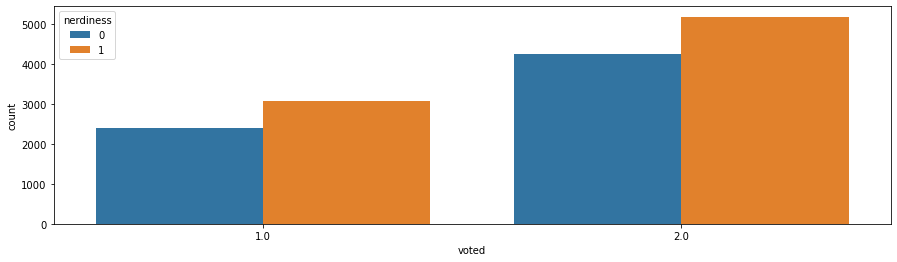

In [159]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['voted'],hue = 'nerdiness')

음.. 얜 상관관계도 낮고 결측치 수도 낮아서 그냥 2로 주자

#### married

In [160]:
print(train['married'].isnull().value_counts())

False    14918
True        82
Name: married, dtype: int64


<AxesSubplot:xlabel='married', ylabel='count'>

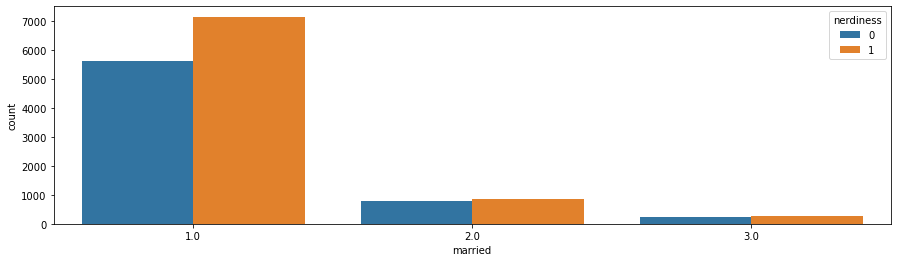

In [161]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['married'],hue = 'nerdiness')

얘도 다 1로 주자.

#### familysize

In [162]:
print(train['familysize'].isnull().value_counts())

False    14681
True       319
Name: familysize, dtype: int64


<AxesSubplot:xlabel='familysize', ylabel='count'>

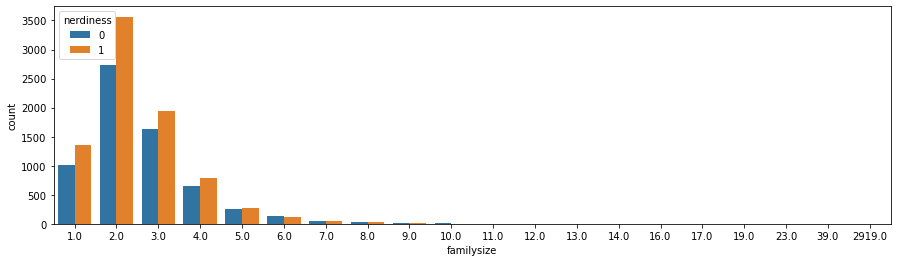

In [163]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['familysize'],hue = 'nerdiness')

familysize가 지나치게 큰 데이터들이 쓸만한 데이터인지 확인한다.

In [165]:
train[train['familysize'] > 20]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
474,474,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,4.0,5.0,USA,796,60,136,2.0,3.0,4.0,3.0,5.0,4.0,4.0,3.0,4.0,3.0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,3.0,3,1.0,1.0,23,1.0,2.0,2.0,1.0,1.0,23.0,2.0,1
1019,1019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,USA,2,39,172,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4.0,2,3.0,2.0,100,3.0,10.0,5.0,1.0,1.0,2919.0,1.0,0
1287,1287,5.0,4.0,5.0,3.0,3.0,4.0,4.0,5.0,2.0,5.0,1.0,2.0,3.0,3.0,2.0,5.0,4.0,4.0,2.0,5.0,4.0,5.0,5.0,5.0,1.0,4.0,ZAF,2,198,216,2.0,1.0,5.0,5.0,3.0,4.0,4.0,3.0,2.0,3.0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1.0,3,2.0,2.0,15,1.0,7.0,2.0,2.0,1.0,39.0,2.0,1
9817,9817,5.0,4.0,5.0,3.0,3.0,4.0,4.0,5.0,2.0,5.0,1.0,2.0,3.0,3.0,2.0,5.0,4.0,4.0,2.0,5.0,4.0,5.0,5.0,5.0,1.0,4.0,ZAF,2,198,216,2.0,1.0,5.0,5.0,3.0,4.0,4.0,3.0,2.0,3.0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1.0,3,2.0,2.0,15,1.0,7.0,2.0,2.0,1.0,39.0,2.0,1
11274,11274,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,4.0,5.0,USA,796,60,136,2.0,3.0,4.0,3.0,5.0,4.0,4.0,3.0,4.0,3.0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,3.0,3,1.0,1.0,23,1.0,2.0,2.0,1.0,1.0,23.0,2.0,1


분명 저 두 번째 놈은 장난친게 확실하다.. 계속 눈에 밟힌다..  
test셋 범주도 좀 봐야겠다.

In [167]:
test[test['familysize'] > 20]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
1486,1486,5.0,4.0,4.0,5.0,3.0,5.0,5.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,NaN,596,600,112,3.0,2.0,4.0,1.0,5.0,3.0,4.0,3.0,5.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,3.0,3,2.0,1.0,23,1.0,12.0,4.0,2.0,1.0,23.0,2.0
4665,4665,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,2.0,5.0,USA,4,81,132,1.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1.0,2,2.0,1.0,17,1.0,12.0,2.0,2.0,1.0,39947739.0,2.0
5125,5125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,USA,1,89,256,1.0,5.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4.0,2,3.0,2.0,45,3.0,12.0,5.0,1.0,1.0,47.0,2.0
6475,6475,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,USA,1,89,256,1.0,5.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4.0,2,3.0,2.0,45,3.0,12.0,5.0,1.0,1.0,47.0,2.0
8209,8209,3.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,4.0,1.0,2.0,4.0,1.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,2.0,1.0,5.0,3.0,4.0,ESP,24,160,141,3.0,4.0,4.0,3.0,5.0,4.0,2.0,3.0,4.0,5.0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3.0,3,2.0,2.0,23,1.0,4.0,1.0,1.0,1.0,22.0,2.0
8726,8726,3.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,4.0,1.0,2.0,4.0,1.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,2.0,1.0,5.0,3.0,4.0,ESP,24,160,141,3.0,4.0,4.0,3.0,5.0,4.0,2.0,3.0,4.0,5.0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3.0,3,2.0,2.0,23,1.0,4.0,1.0,1.0,1.0,22.0,2.0
10075,10075,5.0,3.0,5.0,5.0,4.0,1.0,1.0,2.0,1.0,4.0,4.0,1.0,1.0,3.0,1.0,3.0,4.0,5.0,4.0,1.0,4.0,2.0,1.0,1.0,3.0,2.0,NaN,4,71,111,1.0,3.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,3,2.0,1.0,15,1.0,12.0,5.0,2.0,1.0,36.0,2.0
11773,11773,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,USA,2,39,172,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4.0,2,3.0,2.0,100,3.0,10.0,5.0,1.0,1.0,2919.0,1.0
14526,14526,5.0,4.0,4.0,5.0,3.0,5.0,5.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,NaN,596,600,112,3.0,2.0,4.0,1.0,5.0,3.0,4.0,3.0,5.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,3.0,3,2.0,1.0,23,1.0,12.0,4.0,2.0,1.0,23.0,2.0
25389,25389,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,2.0,5.0,USA,4,81,132,1.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1.0,2,2.0,1.0,17,1.0,12.0,2.0,2.0,1.0,39947739.0,2.0


역시나 아상한 패밀리가 있다.. test셋도 저런 큰 패밀리 사이즈는 줄여줘야겠다..  
결측치는 2로 채워주자

#### ASD

In [168]:
print(train['ASD'].isnull().value_counts())

False    14911
True        89
Name: ASD, dtype: int64


<AxesSubplot:xlabel='ASD', ylabel='count'>

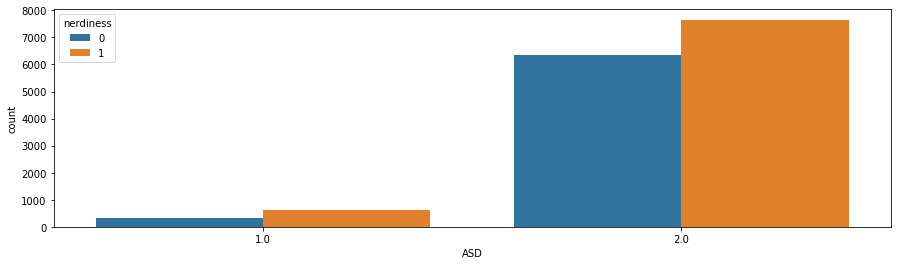

In [169]:
plt.figure(figsize=(15,4))
sns.countplot(data= train, x= train['ASD'],hue = 'nerdiness')

도대체 이게 뭘까.. ASD가 가르키는 걸 모르겠다.. 결측치 그냥 2 넣으면 될 것 같다.

### 이외에...

중복되는거 없애고.. 말도안되게 큰 값 맞춰주고.. 결측치 채워주고.. 장난친 애는 그냥 drop해주고.. 응답 수가 N개 이상일 경우 그냥 드롭.. (5로 했을 때 한 70개 나왔는데 위 처리 끝나면 달라질 수도??)

## boxplot

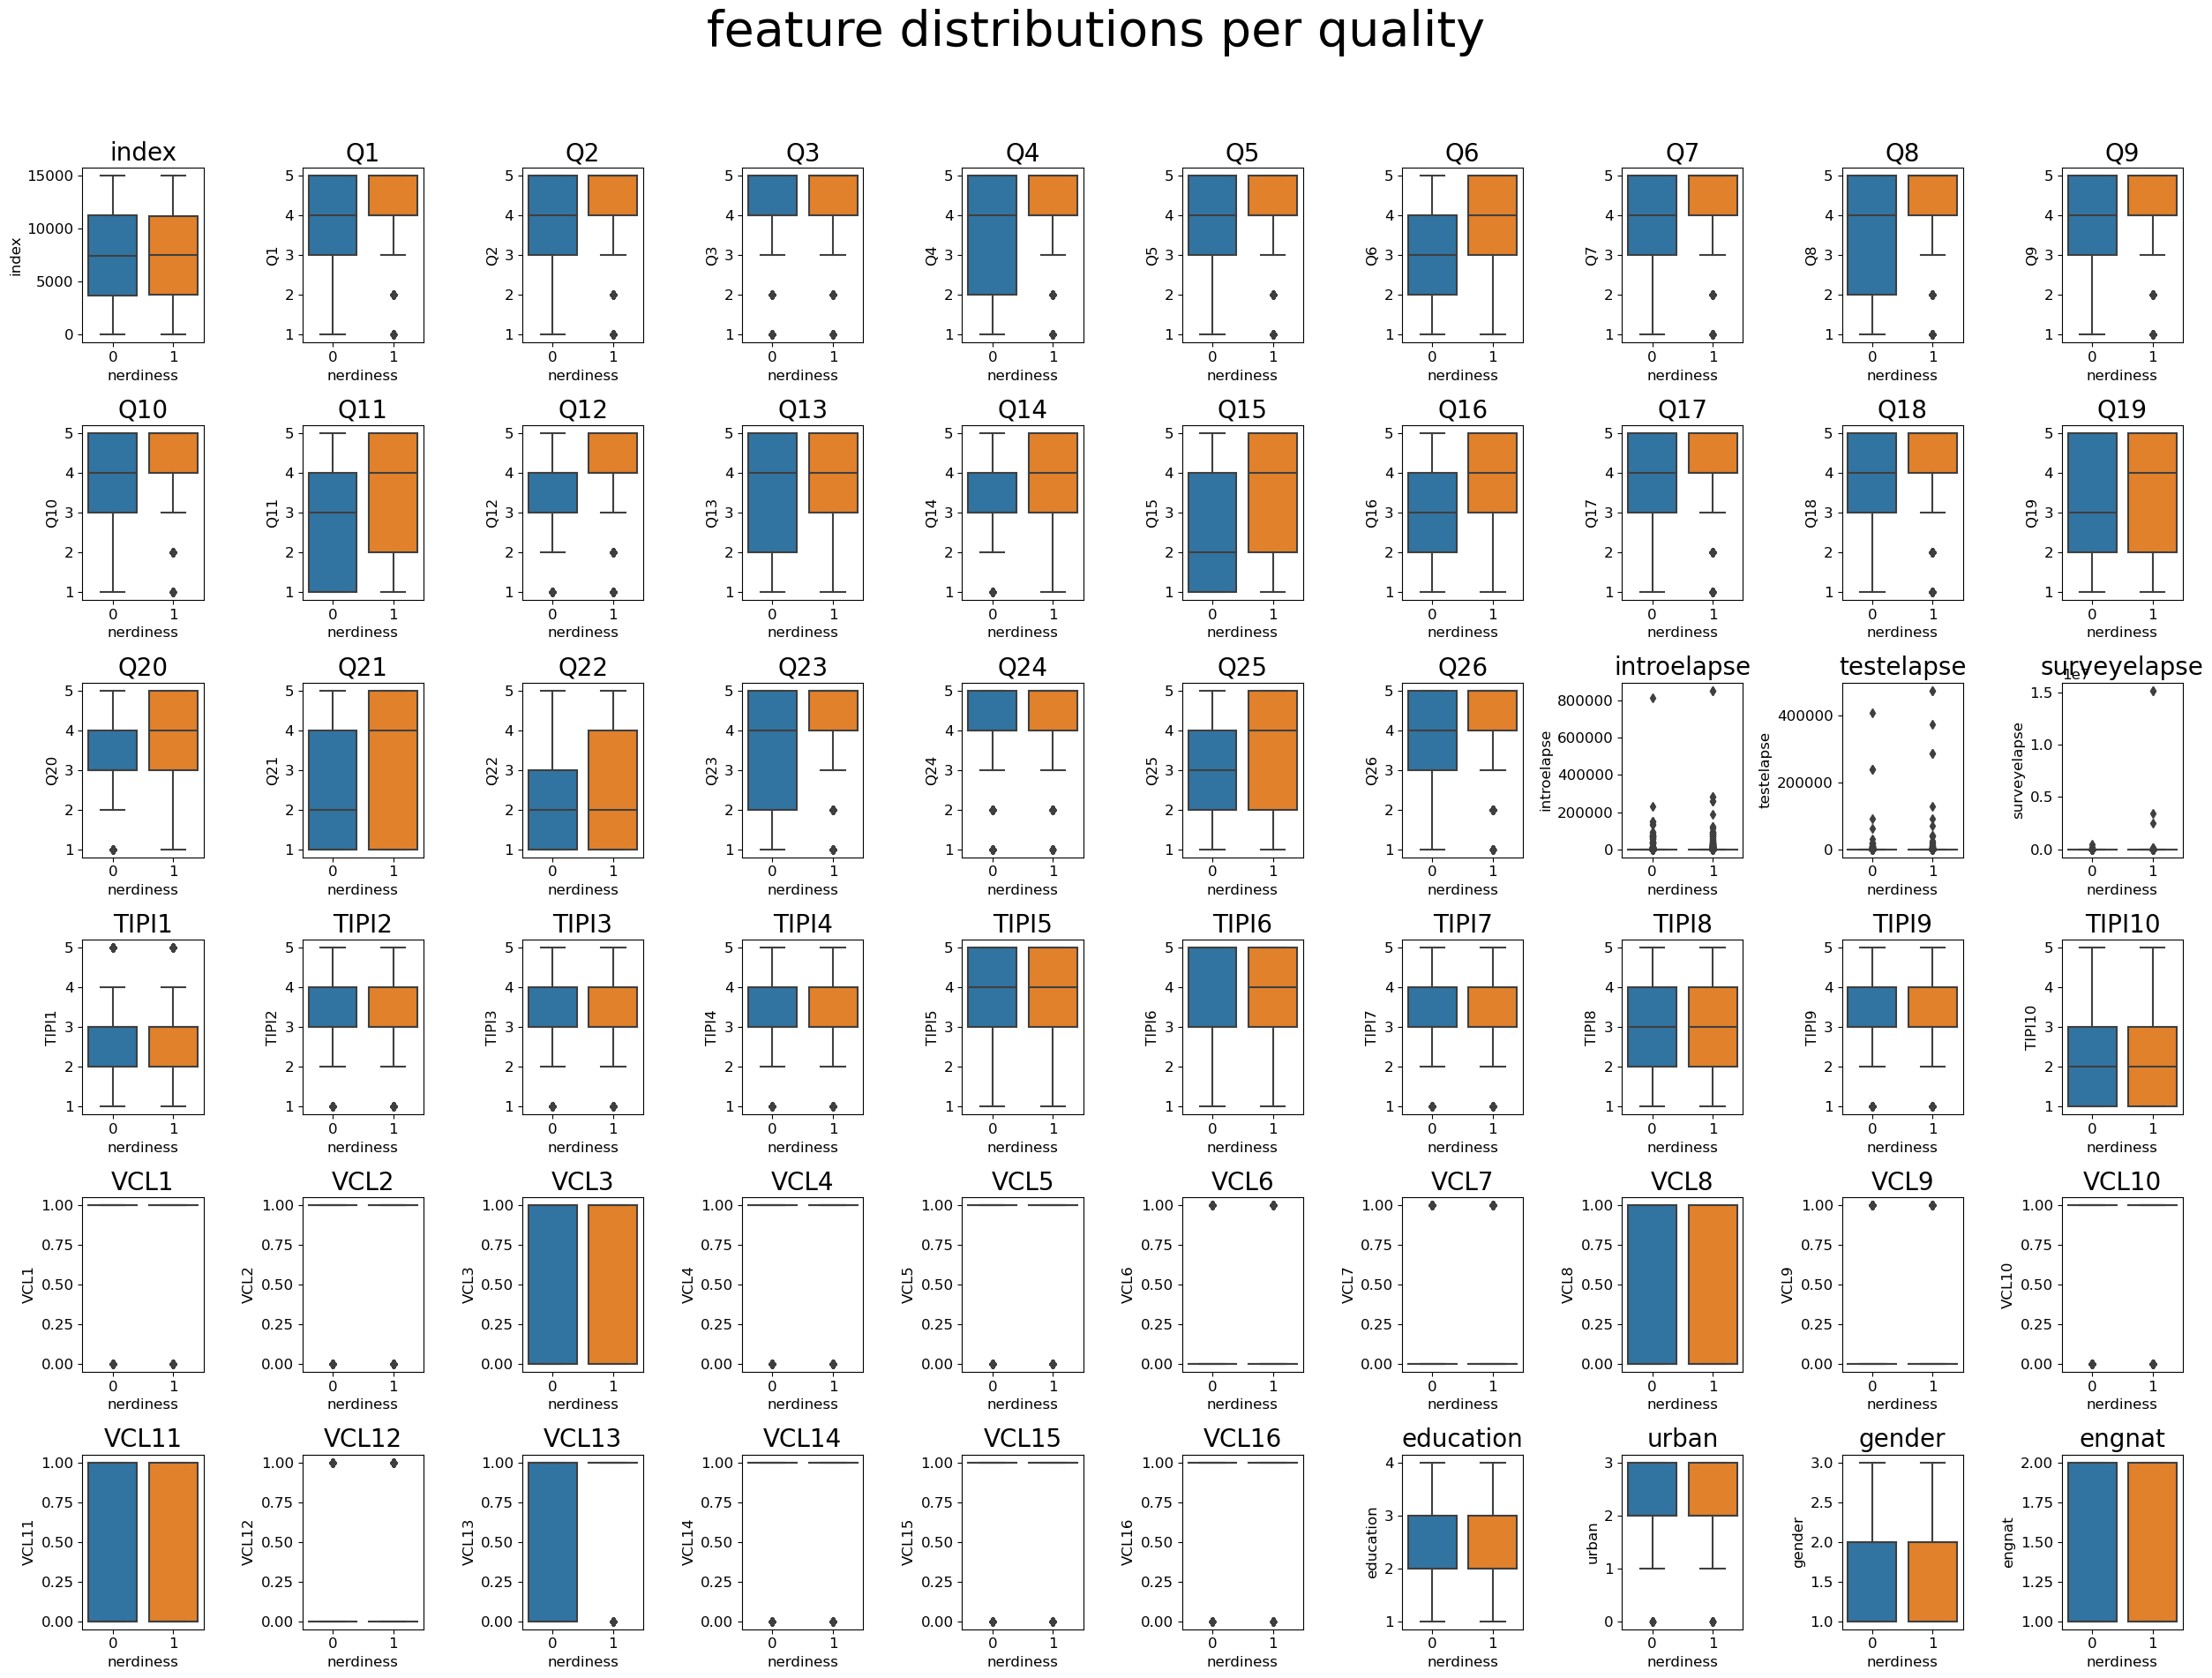

In [32]:
# 수치형 데이터 분리
numeric_feature = train.columns[(train.dtypes=='int64') | (train.dtypes=='float64')]
num_train = train[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(6, 10, figsize=(25, 20))


fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_train.columns[:-1]):
    sns.boxplot(x='nerdiness', y= col, ax=ax, data=num_train)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Q, TIPI, VCL은 사실상 설문조사의 결과이므로 유의미한 분석을 하기 어려움.. 다만 어떤 질문 항목이 nerdiness를 판단하는데 더 유효한지는 판단할 수 있었음  

- lapse의 경우
지나치게 응답시간이 긴 사람들이 있었음.. 이 outlier들을 제거할 필요가 있음


In [41]:
train['introelapse'].describe()

count     15000.000000
mean        767.137733
std       13835.948037
min           1.000000
25%           4.000000
50%          10.000000
75%          36.000000
max      855030.000000
Name: introelapse, dtype: float64

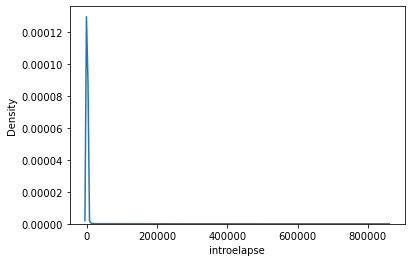

In [7]:
temp = train.loc[train['introelapse'].notnull(), 'introelapse']
sns.kdeplot(temp)
plt.show()

lapse관련 수치갑들은 모두 응답시간 관련인데 사실상 밥을 중간에 먹고오거나, 아니면 인터넷 지연으로 인한 문제가 생겨 발생해 outlier가 생겼울 수도 있으므로 이 세 개는 빼는 것이 좋아보임..  
추가적으로 상관관계도 낮게 나와 열 자체를 없애는데 별 문제가 없어보임